Predicting sales using multiple linear regression can significantly benefit a business by providing valuable insights into future performance and helping to optimize decision-making. By analyzing the relationship between sales and various influencing factors—such as marketing spend, pricing strategies, seasonality, and economic conditions—businesses can identify key drivers of revenue and forecast demand more accurately. This enables them to allocate resources efficiently, plan inventory levels, set realistic targets, and develop targeted marketing campaigns that maximize ROI. Additionally, understanding these patterns allows businesses to anticipate market shifts, mitigate risks, and stay competitive in dynamic environments, ultimately driving sustainable growth and profitability.

In [1]:
import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


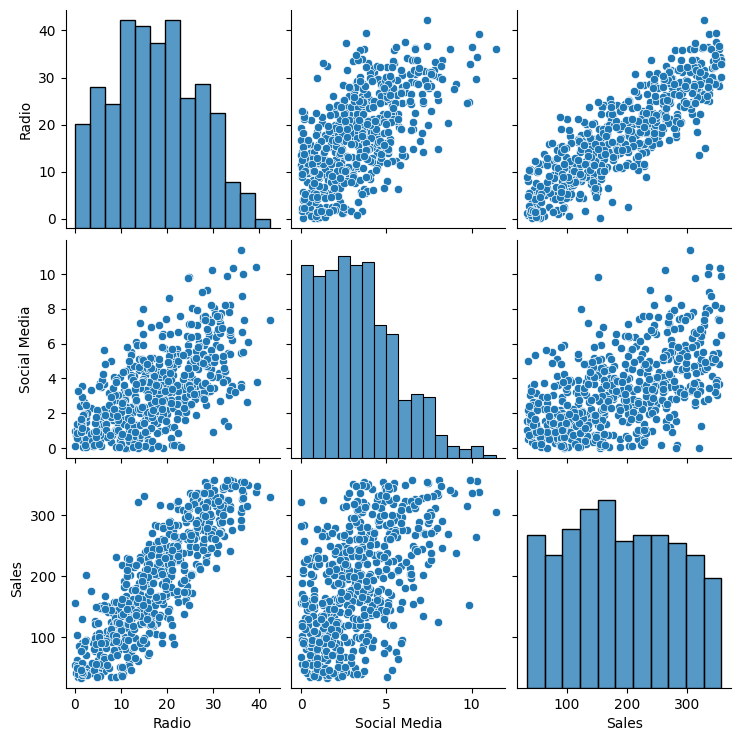

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous = df[[ 'Radio', 'Social Media', 'Sales']]
sns.pairplot(continuous)
plt.show()

In [3]:
print(f'The correlation between the features')
print('\n')
df.corr(numeric_only = True)

The correlation between the features




,Radio,Social Media,Sales
Radio,1.000000,0.629941,0.858036
Social Media,0.629941,1.000000,0.542048
Sales,0.858036,0.542048,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [5]:
df_encoded = pd.get_dummies(df, columns = ['TV', 'Influencer'], drop_first = True)
df_encoded

,Radio,Social Media,Sales,TV_Low,TV_Medium,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,3.518070,2.293790,55.261284,True,False,False,True,False
1,7.756876,2.572287,67.574904,True,False,True,False,False
2,20.348988,1.227180,272.250108,False,False,False,True,False
3,20.108487,2.728374,195.102176,False,True,True,False,False
4,31.653200,7.776978,273.960377,False,False,False,False,True
...,...,...,...,...,...,...,...,...
567,14.656633,3.817980,191.521266,False,True,False,True,False
568,28.110171,7.358169,297.626731,False,False,True,False,False
569,11.401084,5.818697,145.416851,False,True,False,False,True
570,21.119991,5.703028,209.326830,False,True,False,False,False


In [6]:
from sklearn.model_selection import train_test_split

y = df_encoded[['Sales']]
print('The values of y')
print(f'\n {y.head()}')

x = df_encoded.drop('Sales', axis = 1)
x = x.rename( columns = {'Social Media': 'Social_media'})
print('\nThe values of x')
print(f'\n {x.head()}')

The values of y

         Sales
0   55.261284
1   67.574904
2  272.250108
3  195.102176
4  273.960377

The values of x

        Radio  Social_media  TV_Low  TV_Medium  Influencer_Mega  \
0   3.518070      2.293790    True      False            False   
1   7.756876      2.572287    True      False             True   
2  20.348988      1.227180   False      False            False   
3  20.108487      2.728374   False       True             True   
4  31.653200      7.776978   False      False            False   

   Influencer_Micro  Influencer_Nano  
0              True            False  
1             False            False  
2              True            False  
3             False            False  
4             False             True  


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

In [9]:
import statsmodels.formula.api as smf


model_formula = 'Sales ~ Radio + TV_Low + TV_Medium + Influencer_Mega + Influencer_Micro + Influencer_Nano + Social_media'

train_data = pd.concat([x_train, y_train], axis = 1)

model = smf.ols(formula = model_formula, data = train_data).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     613.1
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          2.93e-225
Time:                        09:37:46   Log-Likelihood:                -2166.8
No. Observations:                 457   AIC:                             4350.
Df Residuals:                     449   BIC:                             4383.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [10]:
import statsmodels.api as sm

y_predict = model.predict(x_test)

y_test = y_test.values.ravel()
residuals = y_test - y_predict

y_test.shape

(115,)

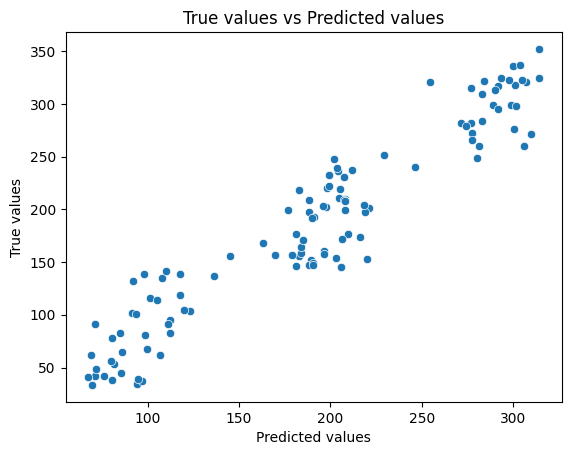

In [11]:
sns.scatterplot(x = y_predict, y = y_test)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('True values vs Predicted values')
plt.show()

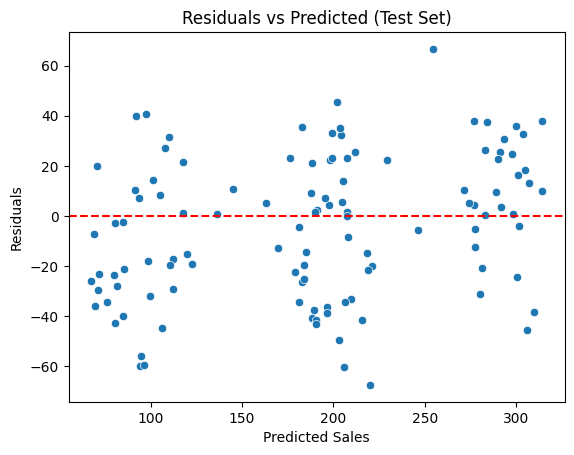

In [12]:
sns.scatterplot(x = y_predict, y = residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Test Set)")
plt.show()

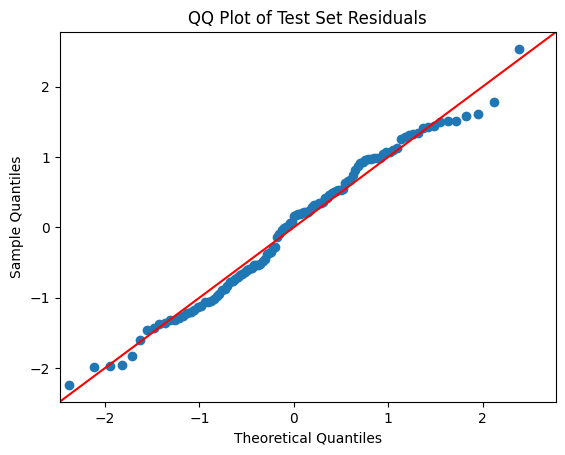

In [13]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Test Set Residuals")
plt.show()


In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     613.1
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          2.93e-225
Time:                        09:39:47   Log-Likelihood:                -2166.8
No. Observations:                 457   AIC:                             4350.
Df Residuals:                     449   BIC:                             4383.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               